<a href="https://colab.research.google.com/github/juminsuh/Reinforcement_Learning/blob/main/%5B24_1_%EC%A0%95%EA%B7%9C%EC%84%B8%EC%85%98%5DDP_%EC%A3%BC%EB%AF%BC%EC%84%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import


In [ ]:
import os
import time
import numpy as np
import pandas as pd
from typing import Tuple
import random
from collections import defaultdict
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# load env


*   파일을 사용하기 위해서는 cwd를 py가 있는 위치로 변경해야 함



In [ ]:
import os
os.chdir('/content/drive/MyDrive')#change directory

In [ ]:
!python my_environment.py

In [ ]:
from my_environment import GridWorldEnvironment

# Dynamic Programming

# 01. Policy iteration

In [ ]:
class PolicyIteration:
    def __init__(self, env):
        #about env
        self.env=env
        self.action_space=env.action_space #['up','down','left', 'right']
        self.num_action=len(self.action_space)

        #value 2d list
        self.value_table=np.zeros(shape=(env.height, env.width)).tolist()

        #상하좌우 동일한 확률로 초기화. 3차원. init policy
        self.policy_table=np.full(shape=(env.height, env.width, self.num_action), fill_value=0.25).tolist()

        #end state's policy table should be empty
        self.policy_table[env.end_point[0]][env.end_point[1]]=[]

        #discount factor
        self.gamma=0.9

    def policy_evaluation(self):
        #value function update
        for state in self.env.total_states:
            #벨만 기대 방정식을 이용해 현재 정책에 대한 상태 가치 함수 구하기
            value=0.0

            if state==self.env.end_point:
                self.value_table[state[0]][state[1]]=0.0
            else:
                #현재 상태의 정책을 반환
                state_policy=self.get_policy(state)

                for action_idx in range(self.num_action):
                    next_state=self.env.state_after_action(state, action_idx) #현재 상태에서 어떤 행동을 한 이후의 상태
                    reward=self.env.get_reward(state, action_idx)
                    next_value=self.get_value(next_state)
                    value+=state_policy[action_idx]*(reward+self.gamma*next_value) # 벨만 기대 방정식

                self.value_table[state[0]][state[1]]=value

    def policy_improvement(self):
        next_policy=self.policy_table

        for state in self.env.total_states:

            value_list=[]

            # 가치함수를 토대로 반환할 정책 초기화
            result=np.zeros(shape=(self.num_action)).tolist()

            for action_idx in range(self.num_action):
                next_state=self.env.state_after_action(state, action_idx)
                reward=self.env.get_reward(state, action_idx)
                next_value=self.get_value(next_state)

                value=reward+self.gamma*next_value # 각 행동들에 대한 가치 함수를 구함
                value_list.append(value)

            #받을 보상이 최대인 행동들에 대한 탐욕적 발전
            max_value=np.max(value_list)
            max_indices=np.where(value_list==max_value)[0]#보상이 최대인 행동들의 인덱스 반환

            #최댓값이 여러 개일 때 동일한 확률을 나누기 위해서
            prob=1/len(max_indices)

            #최대 보상을 받지 않는 나머지 행동에는 정책 부여 x
            for max_idx in max_indices:
                result[max_idx]=prob

            next_policy[state[0]][state[1]]=result

        self.policy_table=next_policy

    def get_policy(self, state):
        return self.policy_table[state[0]][state[1]]

    def get_value(self, state):
        return self.value_table[state[0]][state[1]]

    #특정 상태의 정책(policy)
    #정책이 policy일 때 4개의 가능한 행동을 랜덤으로 선택
    def get_action(self, state):
        policy=self.get_policy(state)
        action=np.random.choice(range(len(self.action_space)), p=policy)
        return action


# main_PI(policy_iteration)


In [ ]:
env=GridWorldEnvironment(start_point=(0,0), end_point=(4,4), gridworld_size=(5,5))

#클래스에 대한 객체 생성
pi=PolicyIteration(env)

EPISODES=15
RENDER_END=True #종단 상태에 도달했을 때 시각적 렌더링을 시행하기
total_moves=[]

In [ ]:
for epi in range(EPISODES):
    move_cnt=0
    env.traces=[]#traces 초기화
    state=env.start_point

    #클래스에 정의되어 있는 메소드 실행
    pi.policy_evaluation()
    pi.policy_improvement()

    while state!=env.end_point:
        action_idx=pi.get_action(state)
        next_state=env.state_after_action(state, action_idx)
        state=next_state

        env.traces.append(state)
        move_cnt+=1

    total_moves.append(move_cnt)

    print("episode:{}/{}__move_cnt: {}".format(epi+1,EPISODES, move_cnt ))

    if RENDER_END:
        env.render()

episode:1/15__move_cnt: 48
   0  1  2  3  4
0  S  X  X  X  X
1  X  X  X  X  *
2  X  X  X  X  *
3  *  X  X  *  *
4  *  *  X  X  A
episode:2/15__move_cnt: 43
   0  1  2  3  4
0  S  X  X  *  *
1  X  X  X  *  *
2  X  X  *  *  *
3  X  X  *  *  *
4  *  X  X  X  A
episode:3/15__move_cnt: 14
   0  1  2  3  4
0  S  X  X  X  *
1  X  X  *  X  X
2  *  *  *  *  X
3  *  *  *  *  X
4  *  *  *  *  A
episode:4/15__move_cnt: 14
   0  1  2  3  4
0  S  X  *  *  *
1  X  X  *  *  *
2  *  X  *  *  *
3  *  X  *  *  *
4  *  X  X  X  A
episode:5/15__move_cnt: 8
   0  1  2  3  4
0  S  *  *  *  *
1  X  *  *  *  *
2  X  X  *  *  *
3  *  X  *  *  *
4  *  X  X  X  A
episode:6/15__move_cnt: 8
   0  1  2  3  4
0  S  X  X  X  *
1  *  *  *  X  *
2  *  *  *  X  *
3  *  *  *  X  *
4  *  *  *  X  A
episode:7/15__move_cnt: 8
   0  1  2  3  4
0  S  X  *  *  *
1  *  X  X  *  *
2  *  *  X  *  *
3  *  *  X  *  *
4  *  *  X  X  A
episode:8/15__move_cnt: 8
   0  1  2  3  4
0  S  X  X  *  *
1  *  *  X  X  X
2  *  *  *  *  X
3  *  

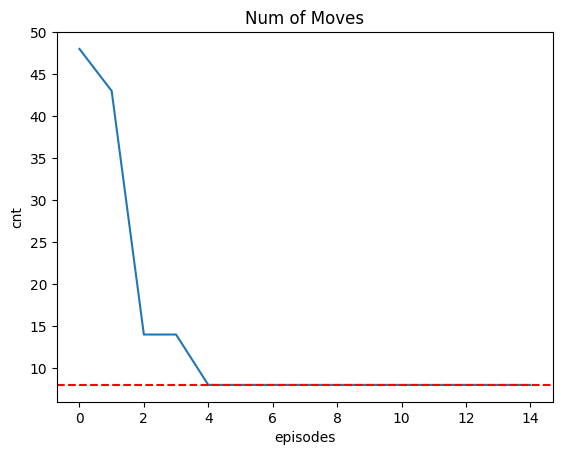

In [ ]:
plt.plot(total_moves)
plt.axhline(y=min(total_moves), color='r', linestyle='--')
plt.ylabel('cnt')
plt.xlabel('episodes')
plt.title('Num of Moves')
plt.show()

In [ ]:
#정책 테이블 표현하기

policy_table_df=pd.DataFrame()

for x in range(env.width):
    for y in range(env.height):
        policy_table_df["({},{})".format(x,y)]=pi.policy_table[x][y]#모든 상태를 좌표로 표현

policy_table_df=policy_table_df.T
col_names=dict(zip(range(len(env.action_space)), env.action_space))
policy_table_df.rename(columns=col_names, inplace=True)
policy_table_df

,up,down,left,right
"(0,0)",0.0,0.5,0.0,0.5
"(0,1)",0.0,0.5,0.0,0.5
"(0,2)",0.0,0.5,0.0,0.5
"(0,3)",0.0,0.5,0.0,0.5
"(0,4)",0.0,1.0,0.0,0.0
"(1,0)",0.0,0.5,0.0,0.5
"(1,1)",0.0,0.5,0.0,0.5
"(1,2)",0.0,0.5,0.0,0.5
"(1,3)",0.0,0.5,0.0,0.5
"(1,4)",0.0,1.0,0.0,0.0


# 02. ValueIteration

In [ ]:
class ValueIteration:

    def __init__(self, env):
        self.env=env
        self.action_space=env.action_space
        self.num_actions=env.num_actions

        #value 2d list
        self.value_table=np.zeros(shape=(env.height, env.width)).tolist()

        #discount factor
        self.gamma=0.9

    def value_iteration(self):
        for state in self.env.total_states:

            if state==self.env.end_point:
                self.value_table[state[0]][state[1]]=0.0
            else:
                value_list=[]
                #벨만 최적 방정식
                for action_idx in range(self.num_actions):
                    next_state=self.env.state_after_action(state, action_idx)
                    reward=self.env.get_reward(state, action_idx)
                    next_value=self.get_value(next_state)
                    value=reward+self.gamma*next_value
                    value_list.append(value)

                self.value_table[state[0]][state[1]]=max(value_list)

    def get_action(self, state):
        if state==self.env.end_point:
            return []
        else:
            value_list=[]
            for action_idx in range(self.num_actions):
                next_state=self.env.state_after_action(state, action_idx)
                reward=self.env.get_reward(state, action_idx)
                next_value=self.get_value(next_state)
                value=reward+self.gamma*next_value
                value_list.append(value)

            max_value=np.max(value_list)
            max_indices=np.where(value_list==max_value)[0]
            action_idx=np.random.choice(max_indices)
            #return max_indices->행동을 탐욕적으로 선택함
            return action_idx

    def get_value(self, state):
        return self.value_table[state[0]][state[1]]



# main_VI(value iteration)

In [ ]:
env=GridWorldEnvironment(start_point=(0,0), end_point=(4,4), gridworld_size=(5,5))

#클래스에 대한 객체 생성
vi=ValueIteration(env)

EPISODES=15
RENDER_END=True
total_moves=[]

In [ ]:
for epi in range(EPISODES):
    move_cnt=0
    env.traces=[]
    state=env.start_point

    #클래스에 정의되어 있는 메소드 실행
    vi.value_iteration()

    while state!=env.end_point:
        action_idx=vi.get_action(state)
        next_state=env.state_after_action(state, action_idx)
        state=next_state

        env.traces.append(state)
        move_cnt+=1

    total_moves.append(move_cnt)

    print("episode:{}/{}__move_cnt:{}".format(epi+1, EPISODES, move_cnt))

    if RENDER_END:
        env.render()

episode:1/15__move_cnt:109
   0  1  2  3  4
0  S  X  X  *  *
1  X  X  X  X  *
2  X  X  X  X  *
3  X  X  *  X  *
4  X  X  *  X  A
episode:2/15__move_cnt:13
   0  1  2  3  4
0  S  X  X  *  *
1  *  X  X  *  *
2  *  *  X  *  *
3  *  *  X  X  *
4  *  *  *  X  A
episode:3/15__move_cnt:13
   0  1  2  3  4
0  S  X  X  *  *
1  X  *  X  X  *
2  *  *  *  X  *
3  *  *  *  X  *
4  *  *  *  X  A
episode:4/15__move_cnt:10
   0  1  2  3  4
0  S  *  *  *  *
1  X  *  *  *  *
2  X  X  X  X  X
3  *  *  *  *  X
4  *  *  *  *  A
episode:5/15__move_cnt:10
   0  1  2  3  4
0  S  *  *  *  *
1  X  *  *  *  *
2  X  X  *  *  *
3  *  X  X  X  *
4  *  *  *  X  A
episode:6/15__move_cnt:10
   0  1  2  3  4
0  S  X  X  X  *
1  *  *  *  X  *
2  *  *  *  X  X
3  *  *  *  *  X
4  *  *  *  *  A
episode:7/15__move_cnt:8
   0  1  2  3  4
0  S  X  X  X  *
1  *  *  *  X  X
2  *  *  *  *  X
3  *  *  *  *  X
4  *  *  *  *  A
episode:8/15__move_cnt:8
   0  1  2  3  4
0  S  X  *  *  *
1  *  X  *  *  *
2  *  X  X  *  *
3  *  *  X 

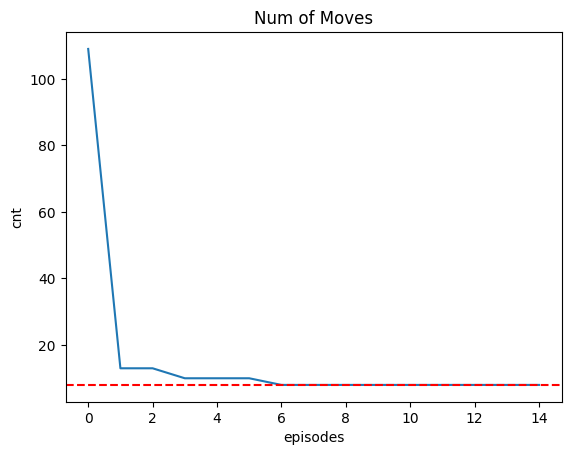

In [ ]:
plt.plot(total_moves)
plt.axhline(y=min(total_moves), color='r', linestyle='--')
plt.ylabel('cnt')
plt.xlabel('episodes')
plt.title('Num of Moves')
plt.show()

In [ ]:
#가치 테이블
#소수점 세 자리로 반올림함

np.array(vi.value_table).round(3)

array([[0.478, 0.531, 0.59 , 0.656, 0.729],
       [0.531, 0.59 , 0.656, 0.729, 0.81 ],
       [0.59 , 0.656, 0.729, 0.81 , 0.9  ],
       [0.656, 0.729, 0.81 , 0.9  , 1.   ],
       [0.729, 0.81 , 0.9  , 1.   , 0.   ]])